In [ ]:
# import library
import pandas as pd
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from pathlib import Path

In [ ]:
# Download latest version
path = kagglehub.dataset_download("aprabowo/indonesia-tourism-destination")
print("Path to dataset files:", path)

100%|██████████| 158k/158k [00:00<00:00, 55.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aprabowo/indonesia-tourism-destination/versions/1


In [ ]:
for filename in os.listdir(path):
    print(filename)

tourism_rating.csv
package_tourism.csv
tourism_with_id.csv
user.csv


In [ ]:
# data user
user = pd.read_csv(path + "/user.csv")
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [ ]:
user.shape

(300, 3)

In [ ]:
user.isnull().sum()

,0
User_Id,0
Location,0
Age,0


In [ ]:
# data rating
tour_rate = pd.read_csv(path + "/tourism_rating.csv")
tour_rate.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [ ]:
tour_rate.shape

(10000, 3)

In [ ]:
tour_rate.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0


In [ ]:
# data pack tour
tour_pack = pd.read_csv(path + "/package_tourism.csv")
tour_pack.head()

,Package,City,Place_Tourism1,Place_Tourism2,Place_Tourism3,Place_Tourism4,Place_Tourism5
0,1,Jakarta,Pasar Tanah Abang,Taman Ayodya,Museum Tekstil,NaN,NaN
1,2,Jakarta,Pasar Tanah Abang,Pasar Taman Puring,Pasar Petak Sembilan,NaN,NaN
2,3,Jakarta,Perpustakaan Nasional,Monas,Masjid Istiqlal,NaN,NaN
3,4,Jakarta,Pulau Tidung,Pulau Bidadari,Pulau Pari,Pulau Pramuka,Pulau Pelangi
4,5,Jakarta,Museum Satria Mandala,Museum Wayang,Museum Bahari Jakarta,Museum Macan (Modern and Contemporary Art in N...,NaN


In [ ]:
tour_pack.shape

(100, 7)

In [ ]:
# data tour with id
tour_info = pd.read_csv(path + "/tourism_with_id.csv")
tour_info.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [ ]:
tour_info.shape

(437, 13)

In [ ]:
tour_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [ ]:
tour_info.isnull().sum()

,0
Place_Id,0
Place_Name,0
Description,0
Category,0
City,0
Price,0
Rating,0
Time_Minutes,232
Coordinate,0
Lat,0


In [ ]:
tour_info.duplicated().sum()

np.int64(0)

In [ ]:
tour_info['Category'].unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

In [ ]:
tour_info['City'].unique()

array(['Jakarta', 'Yogyakarta', 'Bandung', 'Semarang', 'Surabaya'],
      dtype=object)

In [ ]:
print('Jumlah userID: ', len(tour_rate.User_Id.unique()))
print('Jumlah placeID: ', len(tour_rate.Place_Id.unique()))
print('Jumlah data rating: ', len(tour_rate))

Jumlah userID:  300
Jumlah placeID:  437
Jumlah data rating:  10000


## Ringkasan Eksplorasi Dataset Pariwisata Indonesia

Dataset ini terdiri dari **4 file utama** yang berisi informasi terkait destinasi wisata dan interaksi pengguna:

- `user.csv` berisi **300 pengguna**, masing-masing memiliki informasi **lokasi dan usia** tanpa nilai kosong.
- `tourism_rating.csv` memuat **10.000 data rating** dari pengguna terhadap tempat wisata, mencakup **300 User_Id** dan **437 Place_Id**, tanpa missing values.
- `package_tourism.csv` berisi **100 paket wisata** yang merekomendasikan hingga 5 destinasi wisata per kota. Beberapa kolom destinasi memiliki nilai `NaN` karena tidak semua paket memiliki 5 tempat.
- `tourism_with_id.csv` menyediakan informasi lengkap tentang **437 destinasi wisata**, termasuk:
  - Nama tempat, deskripsi, kategori, kota, harga tiket, rating, durasi kunjungan, serta koordinat geografis.
  - Kolom `Time_Minutes` memiliki banyak nilai kosong (**232 missing**).
  - Kolom `Unnamed: 11` tidak memiliki data sama sekali dan bisa dihapus.
  - Terdapat **6 kategori wisata**:
    - Budaya
    - Taman Hiburan
    - Cagar Alam
    - Bahari
    - Pusat Perbelanjaan
    - Tempat Ibadah
  - Kota yang tercakup dalam data:
    - Jakarta
    - Yogyakarta
    - Bandung
    - Semarang
    - Surabaya

- Dataset dalam kondisi **bersih**, tidak ada duplikasi atau nilai kosong signifikan (kecuali pada tour_info).


# Data Preprocessing

In [ ]:
# menggabungkan place id tour_info dengan place id tour_rate
info_tourism = tour_info[["Place_Id", "Place_Name", "Description", "City", "Category"]]
all_tourism_rate = tour_rate
df = pd.merge(all_tourism_rate, info_tourism, on='Place_Id', how='left')
df.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya


Data `tour_rate` yang berisi rating pengguna digabungkan dengan `tour_info` yang berisi informasi lengkap tempat wisata. Ini menghasilkan dataset `df` yang menyatukan data rating, nama tempat, deskripsi, kota, dan kategori wisata.


In [ ]:
# menggabungkan city dengan categori
df['City_Category'] = df[['City','Category']].agg(' '.join, axis=1)
df.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,City_Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya


Dibuat fitur baru `City_Category` yang menggabungkan kota dan kategori wisata. Fitur ini dapat membantu analisis atau rekomendasi berdasarkan kombinasi lokasi dan jenis wisata.

In [ ]:
df.isnull().sum()

,0
User_Id,0
Place_Id,0
Place_Ratings,0
Place_Name,0
Description,0
City,0
Category,0
City_Category,0


Hasil pengecekan menunjukkan bahwa tidak ada nilai kosong pada dataset `df`, sehingga data siap untuk digunakan dalam analisis lebih lanjut tanpa perlu imputasi.

In [ ]:
# Membuang data duplikat pada variabel preparation
preparation = df.copy()
preparation = preparation.drop_duplicates('Place_Id')
preparation.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,City,Category,City_Category
0,1,179,3,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Budaya,Yogyakarta Budaya
1,1,344,2,Pantai Marina,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Bahari,Semarang Bahari
2,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Taman Hiburan,Jakarta Taman Hiburan
3,1,373,3,Museum Kereta Ambarawa,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Budaya,Semarang Budaya
4,1,101,4,Kampung Wisata Sosro Menduran,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Budaya,Yogyakarta Budaya


Data `df` masih memiliki duplikasi tempat wisata berdasarkan `Place_Id`, sehingga dilakukan deduplikasi untuk memperoleh data tempat wisata unik sebanyak satu entri per lokasi.

In [ ]:
# mengonversi data series 'Place_Id' dalam bentuk list
place_id = preparation['Place_Id'].tolist()

# mengonversi data series 'Place_Name' dalam bentuk list
place_name = preparation['Place_Name'].tolist()

# mengonversi data series 'Category' dalam bentuk list
place_category = preparation['Category'].tolist()

# mengonversi data 'Description' dalam bentuk list
place_desc = preparation['Description'].tolist()

# mengonversi data series 'City' dalam bentuk list
place_city = preparation['City'].tolist()

# mengonversi data series 'City_Category' dalam bentuk list
city_category = preparation['City_Category'].tolist()

print(len(place_id))
print(len(place_name))
print(len(place_category))
print(len(place_desc))
print(len(place_city))
print(len(city_category))

437
437
437
437
437
437


Kolom-kolom utama seperti ID, nama, deskripsi, kota, dan kategori disimpan dalam bentuk list untuk mempermudah pembuatan dataframe baru yang unik dan lebih ringkas.

In [ ]:
# membuat dictionary untuk data 'place_id', 'place_name', 'place_category', 'place_desc', 'place_city', 'city_category'
df_baru = pd.DataFrame({
    'Place_Id': place_id,
    'Place_Name': place_name,
    'Category': place_category,
    'Description': place_desc,
    'City': place_city,
    'City_Category': city_category
})

# menampilkan data
df_baru.head()

,Place_Id,Place_Name,Category,Description,City,City_Category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya


Dibuat dataframe baru `df_baru` yang berisi hanya satu entri untuk tiap tempat wisata, dengan informasi nama, deskripsi, kota, dan kategorinya. Dataset ini berguna untuk sistem rekomendasi atau eksplorasi lebih lanjut.

10 tempat wisata yang paling sering dikunjungi:
Place_Name
Gunung Lalakon                               39
Pantai Parangtritis                          39
Gereja Perawan Maria Tak Berdosa Surabaya    38
Pantai Kesirat                               37
Taman Sungai Mudal                           36
Kampung Batu Malakasari                      34
Geoforest Watu Payung Turunan                34
Grand Maerakaca                              33
Taman Film                                   33
NuArt Sculpture Park                         33
Name: count, dtype: int64


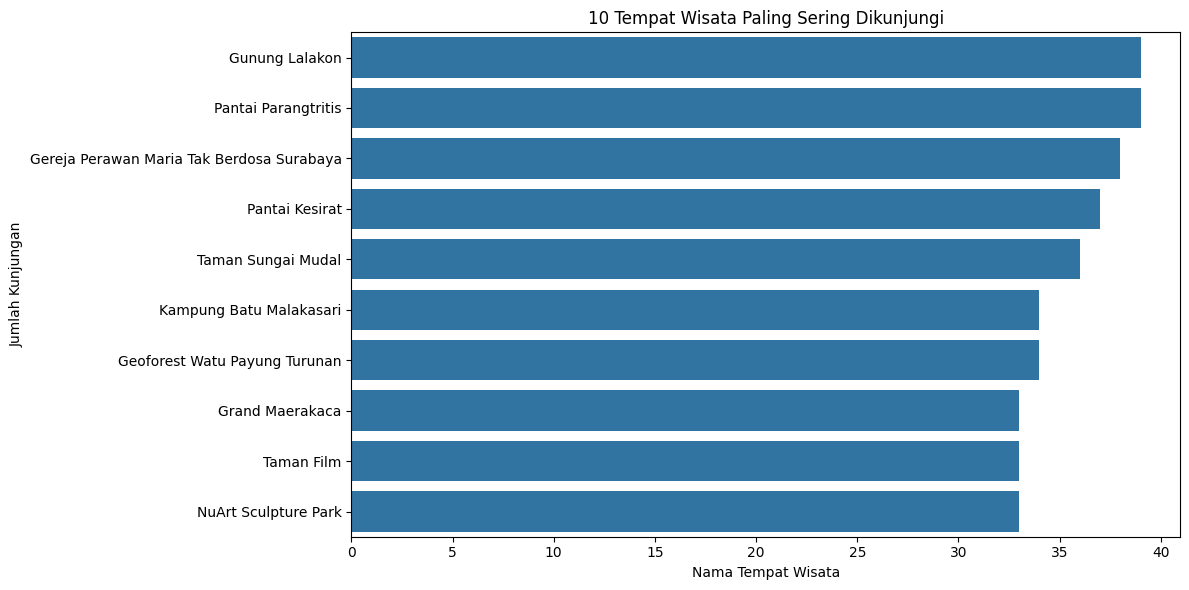

In [ ]:
# menghitung jumlah kunjungan untuk setiap tempat wisata
place_counts = df['Place_Name'].value_counts()

# mengambil 10 tempat wisata dengan jumlah kunjungan terbanyak
top_10_places = place_counts.head(10)

# menampilkan 10 tempat wisata yang paling sering dikunjungi
print("10 tempat wisata yang paling sering dikunjungi:")
print(top_10_places)

# visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_places.values, y=top_10_places.index)
plt.xlabel('Nama Tempat Wisata')
plt.ylabel('Jumlah Kunjungan')
plt.title('10 Tempat Wisata Paling Sering Dikunjungi')
plt.tight_layout()
plt.show()

Dihitung jumlah kunjungan untuk masing-masing tempat wisata, lalu diambil 10 besar yang paling banyak dikunjungi pengguna berdasarkan data rating.
Visualisasi menunjukkan tempat wisata yang paling populer di kalangan pengguna, yang bisa menjadi prioritas dalam sistem rekomendasi atau promosi.


Jumlah kunjungan per kategori tempat wisata:
Category
Taman Hiburan         3053
Budaya                2683
Cagar Alam            2415
Bahari                1079
Pusat Perbelanjaan     385
Tempat Ibadah          385
Name: count, dtype: int64


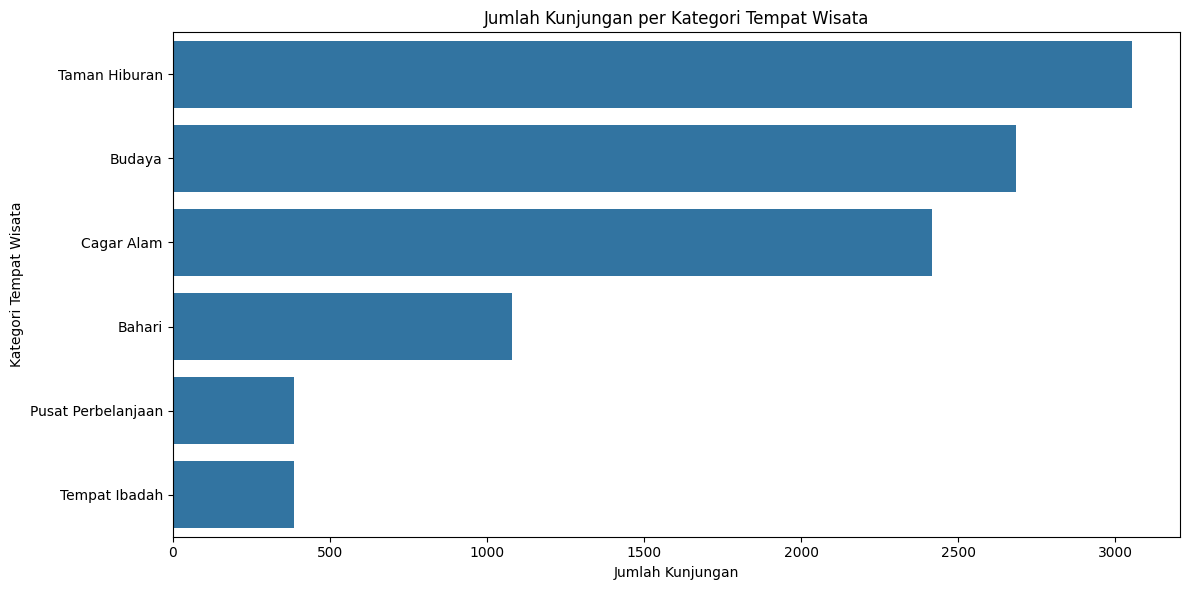

In [ ]:
# menghitung jumlah kunjungan untuk setiap kategori tempat wisata
category_counts = df['Category'].value_counts()

# menampilkan jumlah kunjungan per kategori
print("\nJumlah kunjungan per kategori tempat wisata:")
print(category_counts)

# visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.xlabel('Jumlah Kunjungan')
plt.ylabel('Kategori Tempat Wisata')
plt.title('Jumlah Kunjungan per Kategori Tempat Wisata')
plt.tight_layout()
plt.show()

Kunjungan dibagi berdasarkan kategori tempat wisata (taman hiburan, budaya, cagar alam, bahari, pusat pembelanjaan, tempat ibadah)

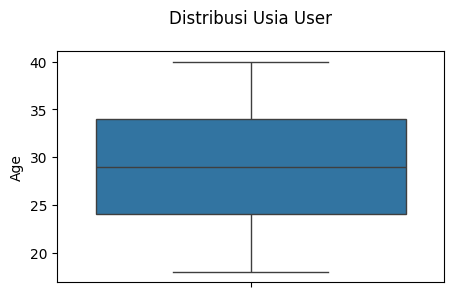

In [ ]:
# distribusi usia
plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

Visualisasi boxplot menunjukkan bahwa sebagian besar pengguna berada dalam rentang usia produktif. Usia ini dapat digunakan untuk mengarahkan strategi personalisasi konten.

In [ ]:
print(user['Age'].describe())

count    300.000000
mean      28.700000
std        6.393716
min       18.000000
25%       24.000000
50%       29.000000
75%       34.000000
max       40.000000
Name: Age, dtype: float64


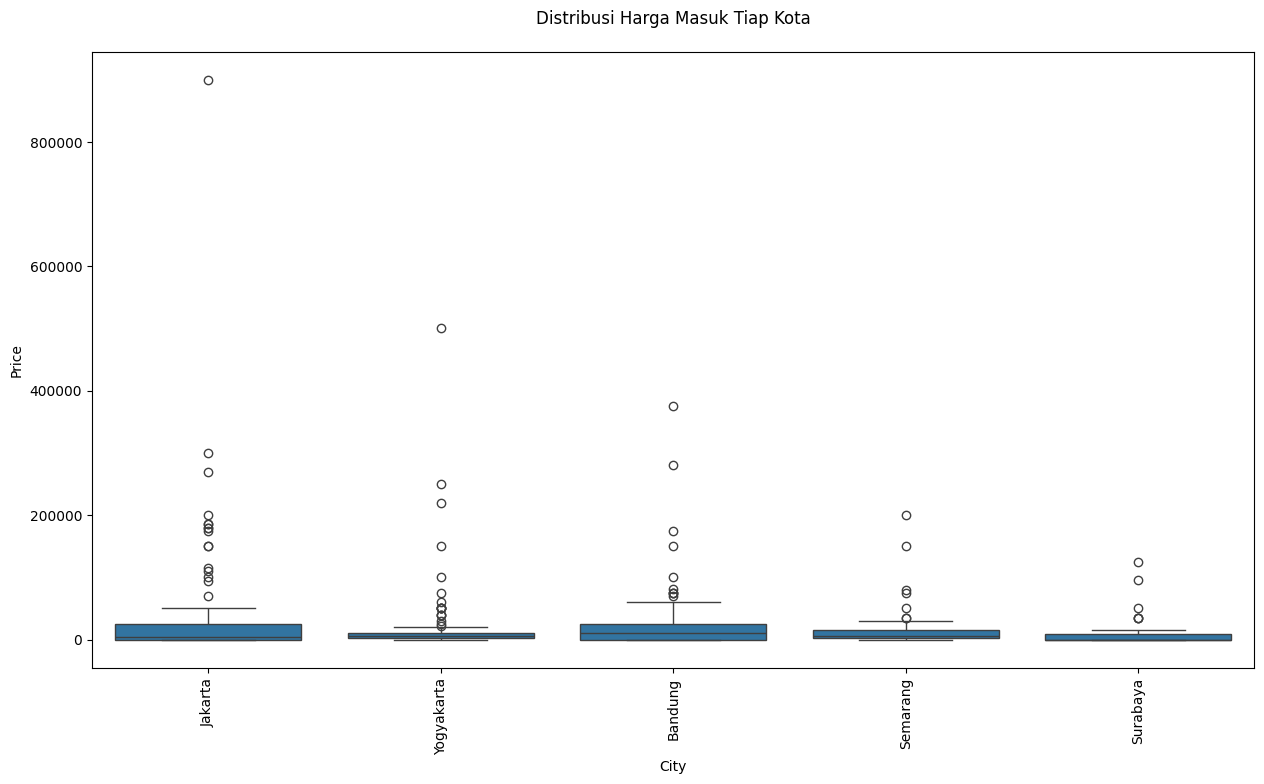

In [ ]:
# distibusi harga masuk tiap kota
plt.figure(figsize=(15, 8))
sns.boxplot(x='City', y='Price', data=tour_info)
plt.title('Distribusi Harga Masuk Tiap Kota', pad=20)
plt.xticks(rotation=90)
plt.show()

Harga tiket masuk tempat wisata bervariasi antar kota. Beberapa kota memiliki distribusi harga yang lebih tinggi, yang bisa menjadi pertimbangan dalam rekomendasi berbasis anggaran.

In [ ]:
print(tour_info['Price'].describe())

count       437.000000
mean      24652.173913
std       66446.374709
min           0.000000
25%           0.000000
50%        5000.000000
75%       20000.000000
max      900000.000000
Name: Price, dtype: float64


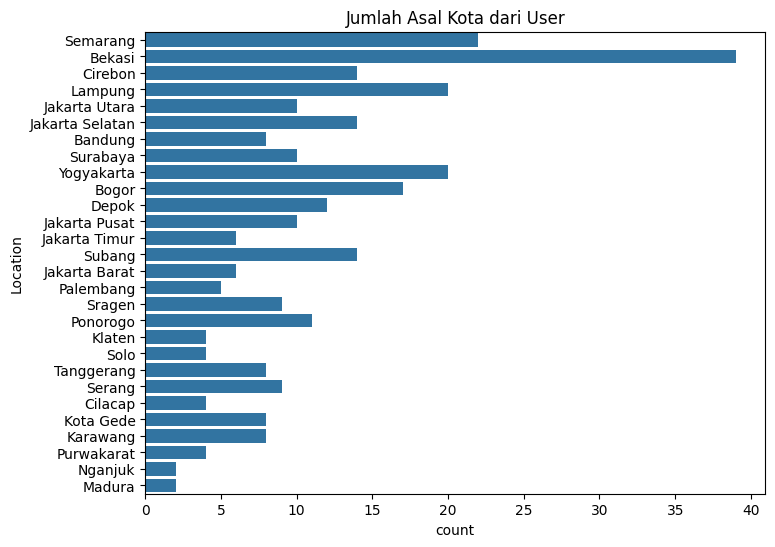

In [ ]:
# Visualisasi asal kota user
askot = user['Location'].apply(lambda x : x.split(',')[0])
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

Mayoritas pengguna berasal dari beberapa kota besar, yang dapat dijadikan dasar segmentasi pasar atau targeting pengguna berdasarkan lokasi.

In [ ]:
print(user['Location'].value_counts())

Location
Bekasi, Jawa Barat              39
Semarang, Jawa Tengah           22
Lampung, Sumatera Selatan       20
Yogyakarta, DIY                 20
Bogor, Jawa Barat               17
Cirebon, Jawa Barat             14
Jakarta Selatan, DKI Jakarta    14
Subang, Jawa Barat              14
Depok, Jawa Barat               12
Ponorogo, Jawa Timur            11
Jakarta Utara, DKI Jakarta      10
Surabaya, Jawa Timur            10
Jakarta Pusat, DKI Jakarta      10
Sragen, Jawa Tengah              9
Serang, Banten                   9
Bandung, Jawa Barat              8
Karawang, Jawa Barat             8
Kota Gede, DIY                   8
Tanggerang, Banten               8
Jakarta Timur, DKI Jakarta       6
Jakarta Barat, DKI Jakarta       6
Palembang, Sumatera Selatan      5
Solo, Jawa Tengah                4
Klaten, Jawa Tengah              4
Cilacap, Jawa Tengah             4
Purwakarat, Jawa Barat           4
Nganjuk, Jawa Timur              2
Madura, Jawa Timur               2
Name: count

In [ ]:
df_baru.head()

,Place_Id,Place_Name,Category,Description,City,City_Category
0,179,Candi Ratu Boko,Budaya,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Yogyakarta,Yogyakarta Budaya
1,344,Pantai Marina,Bahari,"Pantai Marina (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ​ꦩꦫꦶꦤ, trans...",Semarang,Semarang Bahari
2,5,Atlantis Water Adventure,Taman Hiburan,Atlantis Water Adventure atau dikenal dengan A...,Jakarta,Jakarta Taman Hiburan
3,373,Museum Kereta Ambarawa,Budaya,Museum Kereta Api Ambarawa (bahasa Inggris: In...,Semarang,Semarang Budaya
4,101,Kampung Wisata Sosro Menduran,Budaya,Kampung wisata Sosromenduran merupakan kampung...,Yogyakarta,Yogyakarta Budaya


In [ ]:
df_baru.shape

(437, 6)

# Model Development Content Based Filtering

In [ ]:
data = df_baru
data.sample(5)

,Place_Id,Place_Name,Category,Description,City,City_Category
248,396,Monumen Kapal Selam,Budaya,"Monumen Kapal Selam, atau disingkat Monkasel, ...",Surabaya,Surabaya Budaya
170,164,Pintoe Langit Dahromo,Cagar Alam,Pintu Langit Dahromo ini menyediakan berbagai ...,Yogyakarta,Yogyakarta Cagar Alam
285,3,Dunia Fantasi,Taman Hiburan,Dunia Fantasi atau disebut juga Dufan adalah t...,Jakarta,Jakarta Taman Hiburan
267,170,Candi Borobudur,Budaya,"Borobudur (bahasa Jawa: ꦕꦤ꧀ꦝꦶ​ꦧꦫꦧꦸꦝꦸꦂ, transli...",Yogyakarta,Yogyakarta Budaya
236,293,Taman Badak,Taman Hiburan,Taman Badak ini baru saja diresmikan pada tang...,Bandung,Bandung Taman Hiburan


In [ ]:
# insialisasi TfidfVectorizer
tf = TfidfVectorizer()

# melakukan perhitungan idf pada data 'City_Category'
tf.fit(data['City_Category'])

# mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['alam', 'bahari', 'bandung', 'budaya', 'cagar', 'hiburan',
       'ibadah', 'jakarta', 'perbelanjaan', 'pusat', 'semarang',
       'surabaya', 'taman', 'tempat', 'yogyakarta'], dtype=object)

Inisialisasi TfidfVectorizer pada kolom 'City_Category', yang memuat kombinasi kota dan kategori wisata, seperti “Jakarta Taman Hiburan”.

In [ ]:
# melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['City_Category'])

# mengecek ukuran matrix tfidf
tfidf_matrix.shape

(437, 15)

Transformasi ke TF-IDF matrix menghasilkan matriks (437, 15), artinya ada 437 tempat dan 15 token unik (kota/kategori).

In [ ]:
# mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.69559204],
        [0.        , 0.72824058, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.5360408 , 0.        ,
         0.        ],
        ...,
        [0.        , 0.7724966 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.55900007, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.57127819, 0.        ,
         0.58930677]])

Konversi TF-IDF menjadi DataFrame untuk eksplorasi nilai bobot tiap token pada tiap tempat.

In [ ]:
# membuat dataframe untuk melihat tf-idf matrix
# kolom diisi dengan City_Category
# baris diisi dengan nama place

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=data['Place_Name']
).sample(22, axis=1, replace=True).sample(10, axis=0)

,surabaya,cagar,perbelanjaan,pusat,cagar,hiburan,budaya,bandung,bandung,yogyakarta,...,taman,surabaya,pusat,cagar,perbelanjaan,perbelanjaan,jakarta,bahari,ibadah,surabaya
Place_Name,,,,,,,,,,,,,,,,,,,,,
Museum Mandala Wangsit Siliwangi,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.715975,0.698125,0.698125,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
Desa Wisata Lembah Kalipancur,0.000000,0.000000,0.0,0.0,0.000000,0.503799,0.000000,0.000000,0.000000,0.000000,...,0.503799,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
Taman Film,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.715975,0.698125,0.698125,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
Pantai Kesirat,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.571801,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.820392,0.0,0.000000
Ekowisata Mangrove Wonorejo,0.688195,0.513024,0.0,0.0,0.513024,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.688195,0.0,0.513024,0.0,0.0,0.000000,0.000000,0.0,0.688195
Puncak Segoro,0.000000,0.591021,0.0,0.0,0.591021,0.000000,0.000000,0.000000,0.000000,0.548987,...,0.000000,0.000000,0.0,0.591021,0.0,0.0,0.000000,0.000000,0.0,0.000000
Jalan Braga,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.715975,0.698125,0.698125,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
Kyotoku Floating Market,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.715975,0.698125,0.698125,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000
Skyrink - Mall Taman Anggrek,0.000000,0.000000,0.0,0.0,0.000000,0.536041,0.000000,0.000000,0.000000,0.000000,...,0.536041,0.000000,0.0,0.000000,0.0,0.0,0.652166,0.000000,0.0,0.000000


In [ ]:
# menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.4099171 ],
       [0.        , 1.        , 0.        , ..., 0.56256337, 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.41413775, 0.39938865,
        0.61245683],
       ...,
       [0.        , 0.56256337, 0.41413775, ..., 1.        , 0.38888769,
        0.        ],
       [0.        , 0.        , 0.39938865, ..., 0.38888769, 1.        ,
        0.        ],
       [0.4099171 , 0.        , 0.61245683, ..., 0.        , 0.        ,
        1.        ]])

Perhitungan Cosine Similarity antar tempat wisata berbasis City_Category.

In [ ]:
# membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama place
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['Place_Name'], columns=data['Place_Name'])
print('Shape:', cosine_sim_df.shape)

# menampilkan cosine
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (437, 437)


Place_Name,Tugu Proklamasi,Jogja Bay Pirates Adventure Waterpark,Batununggal Indah Club,Museum Joang 45,Ocean Ecopark
Place_Name,,,,,
Pantai Ancol,0.477729,0.000000,0.000000,0.477729,0.414138
Desa Wisata Tembi,0.000000,1.000000,0.651110,0.000000,0.612457
Taman Mini Indonesia Indah (TMII),0.490629,0.612457,0.610949,0.490629,1.000000
Pasar Tanah Abang,0.298981,0.000000,0.000000,0.298981,0.259183
Pasar Baru,0.000000,0.000000,0.205346,0.000000,0.000000
Taman Balai Kota Bandung,0.000000,0.651110,1.000000,0.000000,0.610949
Gereja Tiberias Indonesia Bandung,0.000000,0.000000,0.210396,0.000000,0.000000
Taman Tabanas,0.000000,0.575619,0.574201,0.000000,0.540114
Wisata Agro Edukatif Istana Susu Cibugary,0.490629,0.612457,0.610949,0.490629,1.000000


Pembuatan Cosine Similarity DataFrame, tempat wisata sebagai index dan kolom, menghasilkan matriks (437, 437).

## Mendapatkan Rekomendasi

In [ ]:

def tourism_recommendations(place_name, similarity_data=cosine_sim_df, items=data[['Place_Name', 'Category', 'Description', 'City']], k=5):
    """
    Rekomendasi Tempat Wisata berdasarkan kemiripan dataframe
    Parameter:
    ---
    place_name : tipe data string (str)
                Nama Tempat Wisata (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
    Pada index ini, kita mengambil k dengan nilai similarity terbesar
    pada index matrix yang diberikan (i).
    """
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,place_name].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop place_name agar nama tempat wisata yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(place_name, errors='ignore')
    return pd.DataFrame(closest).merge(items).head(k)

Fungsi `tourism_recommendations` memberikan rekomendasi tempat wisata yang paling mirip berdasarkan kemiripan fitur dalam dataframe, seperti kategori, deskripsi, dan kota.  
Pendekatan ini memungkinkan personalisasi rekomendasi yang lebih tepat, mengoptimalkan pengalaman pengguna di platform wisata digital yang semakin berkembang.  
Dengan teknik similarity matrix dan argpartition, fungsi ini cepat dan efisien untuk skala data yang besar.


In [ ]:
data[data['Place_Name'].eq('Air Mancur Menari')]

,Place_Id,Place_Name,Category,Description,City,City_Category
419,394,Air Mancur Menari,Taman Hiburan,Jembatan Kenjeran dengan air mancur menarinya ...,Surabaya,Surabaya Taman Hiburan


In [ ]:
# mendapatkan rekomendasi place name yang mirip dengan 'Air Mancur Menari'
tourism_recommendations('Air Mancur Menari')

,Place_Name,Category,Description,City
0,Taman Hiburan Rakyat,Taman Hiburan,Taman Hiburan Rakyat atau THR tentunya sudah t...,Surabaya
1,Taman Flora Bratang Surabaya,Taman Hiburan,Taman Flora adalah salah satu taman kota di Su...,Surabaya
2,Taman Prestasi,Taman Hiburan,Taman Prestasi Surabaya merupakan salah satu t...,Surabaya
3,Taman Buah Surabaya,Taman Hiburan,Wisata Taman Buah Undaan di Surabaya adalah sa...,Surabaya
4,Taman Barunawati,Taman Hiburan,Taman Barunawati yang lokasinya berada di kota...,Surabaya


Rekomendasi tempat wisata yang muncul menunjukkan tempat dengan kategori serupa dan lokasi yang dekat, yaitu taman hiburan di Surabaya.  
Hal ini memperkuat validitas model dalam mengenali kesamaan konteks dan lokasi, mendukung pengembangan sistem rekomendasi wisata berbasis konteks lokal yang relevan untuk pengguna.  
Di masa depan, model ini bisa dikembangkan dengan data perilaku pengguna untuk meningkatkan akurasi rekomendasi.

In [ ]:
tourism_recommendations("Trans Studio Bandung")

,Place_Name,Category,Description,City
0,Kampung Batu Malakasari,Taman Hiburan,Kampung Batu Malakasari adalah sebuah tempat w...,Bandung
1,Puspa Iptek Sundial,Taman Hiburan,Puspa Iptek Sundial adalah wahana pendidikan y...,Bandung
2,Dago Dreampark,Taman Hiburan,Dago Dreampark merupakan wisata kekinian di Ko...,Bandung
3,Chingu Cafe Little Seoul,Taman Hiburan,Selain populer karena memiliki pemandangan yan...,Bandung
4,Taman Lansia,Taman Hiburan,Berlibur santai di akhir pekan cocok dilakukan...,Bandung


Fungsi berhasil merekomendasikan tempat wisata bertema taman hiburan di Bandung yang memiliki kemiripan fitur dan lokasi dengan Trans Studio Bandung.  
Ini menandakan kemampuan model untuk mengidentifikasi alternatif wisata yang menarik bagi pengunjung berdasarkan kemiripan pengalaman yang ditawarkan.  
Ke depan, integrasi data real-time seperti ulasan pengguna dan rating dapat memperkuat sistem rekomendasi ini menjadi lebih adaptif dan responsif.

# Model Development dengan Collaborative Filtering

In [ ]:
dt = tour_rate
dt

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4
...,...,...,...
9995,300,425,2
9996,300,64,4
9997,300,311,3
9998,300,279,4


Memuat dataset `tour_rate` ke dalam variabel `dt` dan menampilkan strukturnya. Dataset berisi kolom `User_Id`, `Place_Id`, dan `Place_Ratings` dengan 10.000 baris, yang merepresentasikan rating pengguna terhadap tempat wisata.

## Data Preparation

## Encoding

In [ ]:
# mengubah PlaceID menjadi list tanpa nilai yang sama
place_ids = dt['Place_Id'].unique().tolist()
print('list PlaceID: ', place_ids)

# melakukan encoding placeID
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
print('encoded PlaceID : ', place_to_place_encoded)

# melakukan proses encoding angka ke placeID
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}
print('encoded angka ke PlaceID: ', place_encoded_to_place)

list PlaceID:  [179, 344, 5, 373, 101, 312, 258, 20, 154, 393, 103, 208, 89, 405, 41, 336, 67, 292, 222, 76, 428, 15, 246, 265, 21, 328, 307, 302, 48, 147, 2, 322, 23, 85, 371, 78, 111, 107, 185, 413, 389, 437, 105, 176, 407, 281, 167, 384, 426, 390, 367, 166, 18, 321, 262, 223, 17, 319, 310, 421, 202, 283, 250, 118, 54, 70, 33, 227, 86, 249, 131, 382, 193, 104, 24, 128, 134, 228, 237, 100, 198, 50, 376, 268, 242, 82, 348, 409, 88, 4, 377, 43, 91, 44, 14, 406, 383, 229, 290, 294, 309, 74, 97, 138, 436, 395, 300, 68, 55, 434, 9, 151, 61, 159, 397, 391, 301, 143, 27, 190, 346, 381, 368, 433, 420, 335, 115, 334, 219, 178, 266, 92, 64, 102, 257, 243, 116, 359, 121, 385, 398, 119, 298, 410, 224, 379, 255, 269, 213, 126, 192, 183, 129, 303, 296, 99, 148, 13, 247, 31, 77, 158, 306, 98, 235, 45, 173, 275, 25, 130, 164, 267, 56, 30, 238, 402, 196, 417, 304, 206, 211, 28, 264, 403, 253, 331, 188, 416, 378, 233, 95, 204, 225, 341, 145, 36, 168, 12, 280, 236, 42, 90, 75, 63, 205, 234, 284, 230, 19

Mengubah kolom `Place_Id` menjadi daftar tanpa duplikasi menggunakan `unique().tolist()`. Daftar ini berisi 437 ID tempat unik yang akan digunakan untuk encoding.

Melakukan encoding `Place_Id` menjadi indeks numerik menggunakan dictionary comprehension. `place_to_place_encoded` memetakan ID tempat asli ke indeks (0 hingga 436), dan `place_encoded_to_place` memetakan indeks kembali ke ID asli untuk keperluan dekoding.

In [ ]:
# mengubah userID menjadi list tanpa nilai yang sama
user_ids = dt['User_Id'].unique().tolist()
print('list userID: ', user_ids)

# melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# melakukan proses encoding angka ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

Mengubah kolom `User_Id` menjadi daftar tanpa duplikasi menggunakan `unique().tolist()`. Daftar ini berisi 300 ID pengguna unik yang akan digunakan untuk encoding.

Melakukan encoding `User_Id` menjadi indeks numerik menggunakan dictionary comprehension. `user_to_user_encoded` memetakan ID pengguna asli ke indeks (0 hingga 299), dan `user_encoded_to_user` memetakan indeks kembali ke ID asli untuk keperluan dekoding.

In [ ]:
# mapping User_Id ke dataframe user
dt['user'] = dt['User_Id'].map(user_to_user_encoded)

# mapping Place_Id ke dataframe place
dt['place'] = dt['Place_Id'].map(place_to_place_encoded)

Menambahkan kolom `user` dan `place` ke DataFrame `dt` dengan memetakan `User_Id` dan `Place_Id` menggunakan dictionary encoding yang telah dibuat. Kolom ini berisi indeks numerik untuk pengguna dan tempat.

In [ ]:
# mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print('Jumlah user: ', num_users)

# mendapatkan jumlah place
num_places = len(place_to_place_encoded)
print('Jumlah place: ', num_places)

# mengubah rating menjadi float
dt['Place_Ratings'] = dt['Place_Ratings'].values.astype(np.float32)

# nilai minimum rating
min_rating = min(dt['Place_Ratings'])
print('Nilai minimum rating: ', min_rating)

# nilai maksimum rating
max_rating = max(dt['Place_Ratings'])
print('Nilai maksimum rating: ', max_rating)

Jumlah user:  300
Jumlah place:  437
Nilai minimum rating:  1.0
Nilai maksimum rating:  5.0


Menghitung jumlah pengguna unik (`num_users` = 300) dan jumlah tempat unik (`num_places` = 437) berdasarkan dictionary encoding. Informasi ini akan digunakan untuk menentukan dimensi layer embedding pada model.

Mengubah kolom `Place_Ratings` menjadi tipe data `float32` untuk kompatibilitas dengan model machine learning. Juga menghitung nilai minimum (1.0) dan maksimum (5.0) rating untuk normalisasi.

## Membagi Data untuk Training dan Validasi

In [ ]:
# mengacak dataset
dt = dt.sample(frac=1, random_state=42)
dt

,User_Id,Place_Id,Place_Ratings,user,place
6252,188,207,3.0,187,262
4684,142,268,2.0,141,83
1731,54,103,3.0,53,10
4742,144,119,3.0,143,141
4521,138,288,5.0,137,283
...,...,...,...,...,...
5734,173,402,5.0,172,175
5191,157,85,4.0,156,33
5390,163,18,3.0,162,52
860,28,416,4.0,27,187


Mengacak urutan baris dataset menggunakan `sample(frac=1, random_state=42)` untuk memastikan distribusi data yang acak dan mencegah bias selama pelatihan model.

In [ ]:
# membuat variabel x untuk percobaan
x = dt[['user', 'place']].values

# membuat variabel y untuk membuat rating dari hasil
y = dt['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# membagi menjadi 80:20
train_indences = int(0.8 * dt.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indences],
    x[train_indences:],
    y[:train_indences],
    y[train_indences:],
)

print(x, y)

[[187 262]
 [141  83]
 [ 53  10]
 ...
 [162  52]
 [ 27 187]
 [218   6]] [0.5  0.25 0.5  ... 0.5  0.75 0.25]


Membuat variabel `x` yang berisi pasangan `user` dan `place` sebagai input, serta `y` yang berisi rating ternormalisasi (skala 0-1) menggunakan formula `(rating - min_rating) / (max_rating - min_rating)`. Dataset dibagi menjadi 80% data pelatihan dan 20% data validasi.

## Proses Training

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers

class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_places, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_places = num_places  # Perbaiki penamaan agar konsisten
        self.embedding_size = embedding_size

        # Layer embedding untuk user
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=regularizers.l2(1e-6)
        )
        self.user_bias = layers.Embedding(num_users, 1)  # Layer embedding user bias

        # Layer embedding untuk place
        self.place_embedding = layers.Embedding(
            num_places,
            embedding_size,
            embeddings_initializer='he_normal',
            embeddings_regularizer=regularizers.l2(1e-6)
        )
        self.place_bias = layers.Embedding(num_places, 1)  # Layer embedding place bias

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])  # Embedding user
        user_bias = self.user_bias(inputs[:, 0])  # Bias user
        place_vector = self.place_embedding(inputs[:, 1])  # Embedding place
        place_bias = self.place_bias(inputs[:, 1])  # Bias place

        # Menghitung dot product antara user dan place
        dot_user_place = tf.tensordot(user_vector, place_vector, axes=2)

        # Menambahkan bias
        x = dot_user_place + user_bias + place_bias

        # Aktivasi sigmoid untuk output
        return tf.nn.sigmoid(x)

Mendefinisikan kelas `RecommenderNet` menggunakan TensorFlow Keras untuk model sistem rekomendasi berbasis collaborative filtering. Model menggunakan embedding untuk pengguna dan tempat, serta bias untuk masing-masing, dengan output dihasilkan melalui dot product dan aktivasi sigmoid.

In [ ]:
model = RecommenderNet(num_users, num_places, 100)

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# memulai training
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=8,
    epochs=100,
    verbose=1,
    validation_data=(x_val, y_val)
)

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.6962 - root_mean_squared_error: 0.3479 - val_loss: 0.6971 - val_root_mean_squared_error: 0.3476
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.6906 - root_mean_squared_error: 0.3450 - val_loss: 0.6980 - val_root_mean_squared_error: 0.3482
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6829 - root_mean_squared_error: 0.3345 - val_loss: 0.6989 - val_root_mean_squared_error: 0.3488
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6813 - root_mean_squared_error: 0.3351 - val_loss: 0.6993 - val_root_mean_squared_error: 0.3490
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6735 - root_mean_squared_error: 0.3302 - val_loss: 0.7001 - val_root_mean_squared_error: 0.3495
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.6689 - root_mean_squared_error: 0.3274 - val_loss: 0.6985 - val_root_mean_squared_error: 0.3483
Epoch 7/100
1000/1000 ━━━━━━━━━━━━

Mengompilasi model dengan loss function `BinaryCrossentropy`, optimizer `Adam` (learning rate 0.001), dan metrik `RootMeanSquaredError`. Model dilatih selama 100 epoch dengan batch size 8, menggunakan data pelatihan dan validasi untuk memantau performa.

## Visualisasi Metrik

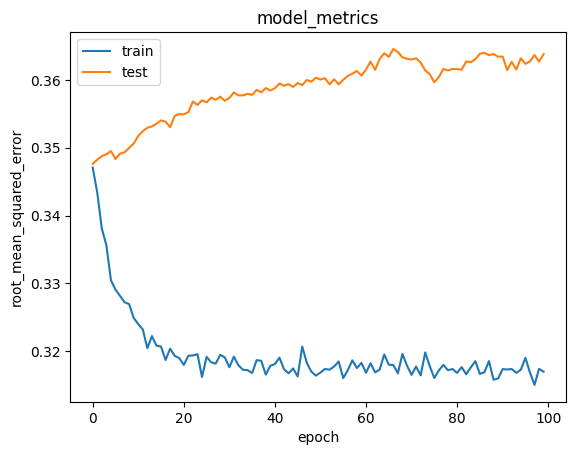

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Grafik menunjukkan perbandingan RMSE untuk data pelatihan (train) dan data uji (test) selama 100 epoch. RMSE data pelatihan menurun tajam di awal dan stabil di sekitar 0.32-0.33, menunjukkan model belajar dengan baik dari data pelatihan. RMSE data uji meningkat setelah epoch awal dan stabil di sekitar 0.35-0.36, mengindikasikan adanya overfit karena model tidak generalisasi dengan baik pada data uji.

## Mendapatkan Rekomendasi Tempat Wisata

Memuat dataset `tour_rate` ke variabel `df` dan dataset lain ke `resto_df` sebagai `df_baru` untuk digunakan dalam analisis dan rekomendasi tempat wisata.
Menerima input `user_id` dari pengguna (misalnya 40) untuk memfilter data berdasarkan pengguna tertentu dan menghasilkan rekomendasi tempat yang sesuai.
Mengambil daftar `Place_Id` yang telah dikunjungi oleh pengguna dengan `User_Id` tertentu dari dataset `df`, digunakan sebagai dasar untuk menentukan tempat yang belum dikunjungi.
Mencari `Place_Id` yang belum dikunjungi oleh pengguna dari `resto_df` dengan menghapus tempat yang sudah ada di `place_visited_by_user`. Hasil difilter agar hanya mencakup ID tempat yang ada dalam `place_to_place_encoded`.
Mengonversi daftar tempat yang belum dikunjungi menjadi array dengan menambahkan `user_encoder` (indeks pengguna yang sudah diencode) untuk setiap tempat, sehingga siap digunakan sebagai input untuk model prediksi.
Menggunakan model yang telah dilatih untuk memprediksi rating untuk setiap tempat yang belum dikunjungi oleh pengguna. Hasil prediksi disimpan dalam bentuk array yang diratakan (`flatten()`).
Mengurutkan indeks rating tertinggi (top 10) menggunakan `argsort()` dan mengonversi indeks tersebut kembali ke `Place_Id` menggunakan `place_encoded_to_place` untuk mendapatkan daftar rekomendasi.

In [ ]:
resto_df = df_baru
df = tour_rate

user_id = int(input("Enter user ID: "))
place_visited_by_user = df[df.User_Id == user_id]

place_not_visited = resto_df[~resto_df['Place_Id'].isin(place_visited_by_user.Place_Id.values)]['Place_Id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Place with high ratings from user')
print('----' * 8)
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
place_df_rows = resto_df[resto_df['Place_Id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.Place_Name, ':', row.Category)
print('----' * 8)
print('Top 10 Place recommendation')
print('----' * 8)
recommended_place = resto_df[resto_df['Place_Id'].isin(recommended_place_ids)]
for row in recommended_place.itertuples():
    print(row.Place_Name, ':', row.Category)

Enter user ID: 40
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Showing recommendations for users: 40
Place with high ratings from user
--------------------------------
Museum Nasional : Budaya
Museum Sumpah Pemuda : Budaya
Rainbow Garden : Cagar Alam
Taman Legenda Keong Emas : Taman Hiburan
Pantai Nguluran : Bahari
--------------------------------
Top 10 Place recommendation
--------------------------------
Monumen Yogya Kembali : Budaya
Jogja Bay Pirates Adventure Waterpark : Taman Hiburan
Keraton Surabaya : Budaya
Desa Wisata Pulesari : Taman Hiburan
Pantai Wediombo : Bahari
Sumur Gumuling : Taman Hiburan
Hutan Mangrove Kulon Progo : Bahari
Pantai Watu Kodok : Bahari
Taman Spathodea : Taman Hiburan
Pantai Depok Jogja : Bahari


Menampilkan 10 tempat yang direkomendasikan oleh model (misalnya Monumen Yogya Kembali, Jogja Bay Pirates Adventure Waterpark, dll.) beserta kategori tempatnya, berdasarkan prediksi rating tertinggi.